In [1]:
%matplotlib inline

In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\djordanova\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as matplot
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, roc_curve
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, PolynomialFeatures

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Empoyees attrition predicting model

### Classification guide for HR staff how to predict staff turnover in an organization and help them to take necessary action for the retention of employees predicted to be at risk of leaving.

## Author: Daniela Yordanova

### Abstract

This project aims to predict whether an employee of a company will leave or not, using some of the well-known Machine Learning algorithms.
We use evaluation of employee performance, average monthly hours at work and number of years spent in the company,
among others, as our features. 

The problem is addressed as a classification task. The dataset is split, using 70% for training the algorithm and 30% for testing it. We will use cross validation technique to train and validate our algorithms. Out-of-Sample testing will be performed with the best selected model.

## Introduction

Employee resignations are a reality for any business. However, if the situation isn't handled properly, key staff members' departures can lead to a downturn in productivity. The
organization may have to employ new people and train them on the tool that is being used, which is time consuming. Most organizations are interested in knowing which of their
employees are at the risk of leaving. 

This project is structured as follows: 

I. Data Description including features decription

II. Data Import and Preprocessing exploring sevral different machine learning algorithms that this project compares. 

III. Descriptive Analysis providing features split by categories (continues and categorical) and exploratory supported by data analysis on both categories. The analysis also gives a view on the features correlation and which features mostly contribute to the turnover model. 

IV. Modeling presents Logistic Regression, Random Forest, Support Vector Machine (Linear and Gaussian) and AdaBoost used as classifiers for employee attrition and metrics used compare the algorithms.

V. Out-of-Sample Testing presents the results of the best classifier applied on a new experiment.

VI. Conclusion section summarizes the results and recommends the best classifier as an approach to solving the employee attrition prediction problem.

### Data Description

The dataset consists of 14999 obseravtions and 10 variables. Each row in dataset represents an employee; each column contains employee attributes:

satisfaction_level (0–1)

last_evaluation (Time since last evaluation in years)

number_projects (Number of projects completed while at work)

average_monthly_hours (Average monthly hours at workplace)

time_spend_company (Time spent at the company in years)

Work_accident (Whether the employee had a workplace accident)

left (Whether the employee left the workplace or not (1 or 0))

promotion_last_5years (Whether the employee was promoted in the last five years)

sales (Department in which they work for)

salary (Relative level of salary)

### Data Import and Preprocessing

In [4]:
# Let's read the data and save it
hr_data = pd.read_excel('HR data.xls')

In [5]:
hr_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
# Rename two of the features for more precise description
hr_data = hr_data.rename(columns = {
    'sales':'department',
    'left': 'attrition',
    'Work_accident': 'work_accident',
    'last_evaluation': 'time_since_last_evaluation_in_years'
}
                        )

In [7]:
hr_data.head()

,satisfaction_level,time_since_last_evaluation_in_years,number_project,average_montly_hours,time_spend_company,work_accident,attrition,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level                     14999 non-null float64
time_since_last_evaluation_in_years    14999 non-null float64
number_project                         14999 non-null int64
average_montly_hours                   14999 non-null int64
time_spend_company                     14999 non-null int64
work_accident                          14999 non-null int64
attrition                              14999 non-null int64
promotion_last_5years                  14999 non-null int64
department                             14999 non-null object
salary                                 14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


We can see that work_accident and promotion_last_5years are categorical features since they have two values '0' and '1'. For now for the purpose of data science part it is much more easy to convert them to object type rather to treat them as continious features.

In [9]:
hr_data['promotion_last_5years'] = hr_data['promotion_last_5years'].astype(str)
hr_data['promotion_last_5years']

0        0
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: promotion_last_5years, Length: 14999, dtype: object

In [10]:
hr_data['work_accident'] = hr_data['work_accident'].astype(str)
hr_data['work_accident']

0        0
1        0
2        0
3        0
4        0
        ..
14994    0
14995    0
14996    0
14997    0
14998    0
Name: work_accident, Length: 14999, dtype: object

Let's check the outcome

In [11]:
hr_data.dtypes

satisfaction_level                     float64
time_since_last_evaluation_in_years    float64
number_project                           int64
average_montly_hours                     int64
time_spend_company                       int64
work_accident                           object
attrition                                int64
promotion_last_5years                   object
department                              object
salary                                  object
dtype: object

In [12]:
#Checking whether our data contains any missing value or not
hr_data.isnull().any()

satisfaction_level                     False
time_since_last_evaluation_in_years    False
number_project                         False
average_montly_hours                   False
time_spend_company                     False
work_accident                          False
attrition                              False
promotion_last_5years                  False
department                             False
salary                                 False
dtype: bool

In [13]:
# Check if we have any NaN values
hr_data.isnull().values.any()

False

### Descriptive Analysis

In [14]:
# Statistics for the columns (features). Set it to all, since default is to describe just the numeric features.
hr_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999,NaN,NaN,NaN,0.612834,0.248631,0.09,0.44,0.64,0.82,1
time_since_last_evaluation_in_years,14999,NaN,NaN,NaN,0.716102,0.171169,0.36,0.56,0.72,0.87,1
number_project,14999,NaN,NaN,NaN,3.80305,1.23259,2,3,4,5,7
average_montly_hours,14999,NaN,NaN,NaN,201.05,49.9431,96,156,200,245,310
time_spend_company,14999,NaN,NaN,NaN,3.49823,1.46014,2,3,3,4,10
work_accident,14999,2,0,12830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attrition,14999,NaN,NaN,NaN,0.238083,0.425924,0,0,0,0,1
promotion_last_5years,14999,2,0,14680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Check attrition distribution percentage
hr_data['attrition'].value_counts() / hr_data.shape[0] * 100

0    76.191746
1    23.808254
Name: attrition, dtype: float64

Our data seems to be imbalanced in terms of attrition. Let's keep a focus on that fact later. It might be useful to explain some results.

In [16]:
# Find correlations
# hr_data.corr()

#### Categorize Features

We will categorize some of the attributes / features based on wheather they are categorical values or continuous (i.e numerical) values. We will use this in later sections to build visualizations.

In [17]:
columns_idx = np.s_[0:] # Slice of first row(header) with all columns.
first_record_idx = np.s_[0] # Index of first record

string_fields = [type(fld) is str for fld in hr_data.iloc[first_record_idx, columns_idx]] # All string fields
all_features = [x for x in hr_data.columns if x != 'attrition']
categorical_features = list(np.array(hr_data.columns)[columns_idx][string_fields])
categorical_featues = [x for x in categorical_features if x != 'attrition']
continuous_features = [x for x in all_features if x not in categorical_features]

print('All Features: ', all_features)
print('\nCategorical Features: ', categorical_features)
print('\nContinuous Features: ', continuous_features)

All Features:  ['satisfaction_level', 'time_since_last_evaluation_in_years', 'number_project', 'average_montly_hours', 'time_spend_company', 'work_accident', 'promotion_last_5years', 'department', 'salary']

Categorical Features:  ['work_accident', 'promotion_last_5years', 'department', 'salary']

Continuous Features:  ['satisfaction_level', 'time_since_last_evaluation_in_years', 'number_project', 'average_montly_hours', 'time_spend_company']


#### Exploratory Data Analysis on continuous features

Let's explore some of the features with numerical values and see how  do they correlate with the attrition.

We can get use of heat map and histrograms to get an understanding of the correlation and the distribution of our continuous features relative to the attrition.

,satisfaction_level,time_since_last_evaluation_in_years,number_project,average_montly_hours,time_spend_company,attrition
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,-0.388375
time_since_last_evaluation_in_years,0.105021,1.000000,0.349333,0.339742,0.131591,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.144822
attrition,-0.388375,0.006567,0.023787,0.071287,0.144822,1.000000


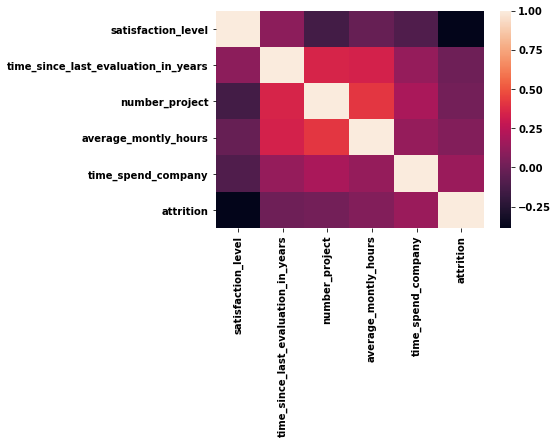

In [18]:
corr = hr_data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

From the heatmap, there is a positive(+) correlation between time_since_last_evaluation_in_years, number_project and average_monthly_hours which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, attrition and satisfaction_level are correlated. Most probably this is because people tend to leave a company more when they are less satisfied.

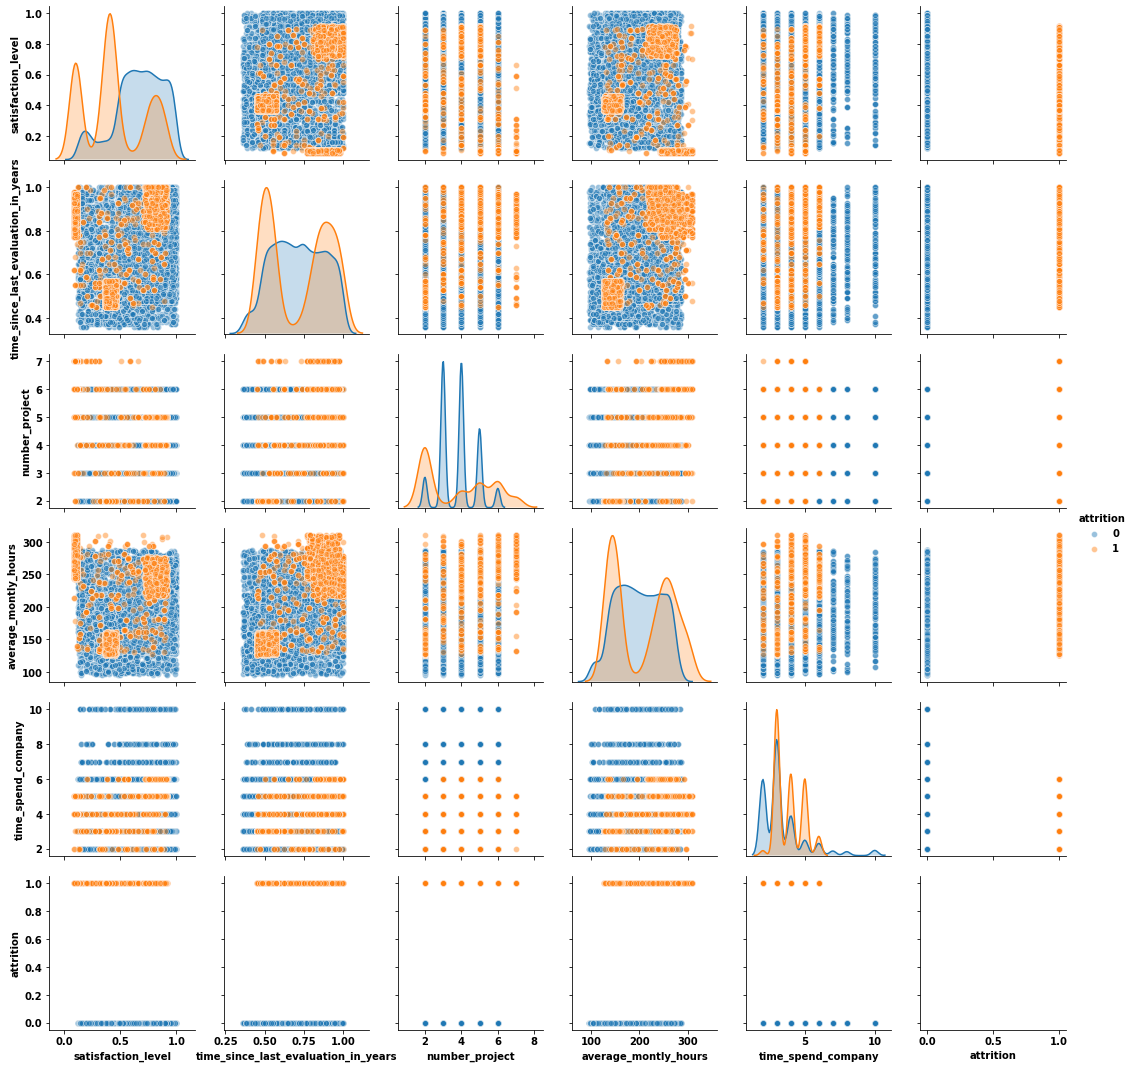

In [19]:
# Plot pairwise relationships in the dataset
sns.pairplot(hr_data[[
    'satisfaction_level', 
    'time_since_last_evaluation_in_years', 
    'number_project', 
    'average_montly_hours', 
    'time_spend_company', 
    'attrition'
]], 
hue = 'attrition', plot_kws = {'alpha': 0.45})
plt.show()

We can conclude that employees that have not recently been evaluated (with higher time_since_last_evaluation_in_years), those working on lower number of projects but spending more hours at work although being empoyees of many years are much more likely to leave the company.

#### Exploratory Data Analysis on categorical features

In [20]:
# Describe columns with objects
hr_data.describe(exclude=np.number)

,work_accident,promotion_last_5years,department,salary
count,14999,14999,14999,14999
unique,2,2,10,3
top,0,0,sales,low
freq,12830,14680,4140,7316


We can get use frequency counts charts to get an understanding of the categorical features relative to the attrition model.

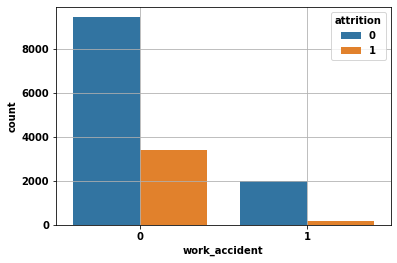

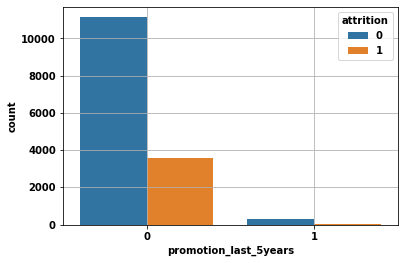

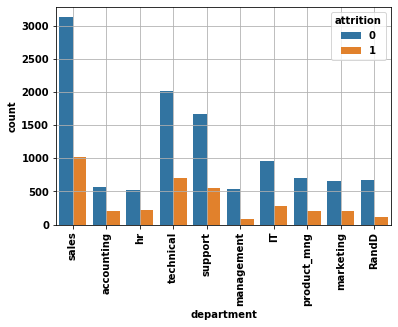

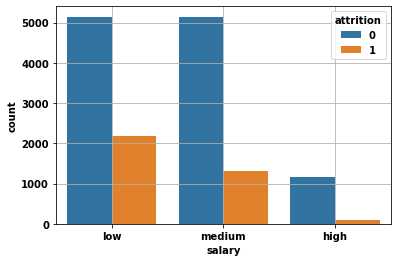

In [21]:
for c in categorical_features:
        sns.countplot(x = c, hue = 'attrition', data = hr_data)
        plt.grid()
        if c == 'department':
            plt.xticks(rotation = 90)
        plt.show()

From above we can conclude that typical profile of an employee that leaves is:

less number of work accidents, rarely being promoted, low level of salary and working in sales, technical or support departments.

On the other hand, employees with high salary do not leave. 

It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the attrition variable.

### Create dummy variables for categorical variables

Let's split our target variable (attrition) from all the rest features and save them separately.

In [22]:
hr_attributes = hr_data.drop('attrition', axis = 1)
hr_target = hr_data.attrition
#hr_attributes
#hr_target

There are four categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling. This will expand the number of our features.

In [23]:
hr_attributes = pd.get_dummies(hr_attributes)

In [24]:
hr_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
time_since_last_evaluation_in_years,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
work_accident_0,14999.0,0.855390,0.351719,0.00,1.00,1.00,1.00,1.0
work_accident_1,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years_0,14999.0,0.978732,0.144281,0.00,1.00,1.00,1.00,1.0
promotion_last_5years_1,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
department_IT,14999.0,0.081805,0.274077,0.00,0.00,0.00,0.00,1.0


In [25]:
hr_attributes.shape, hr_target.shape

((14999, 22), (14999,))

Number of features increased to 22 due to one hot encoding technique used.

In [26]:
#hr_attributes.info()

We can see average_montly_hours feature values are higher than the all the rest features. Let's scale them within the range of $[0; 1]$ while keeping the original distribution.

In [27]:
hr_attributes_scaled = MinMaxScaler().fit_transform(hr_attributes)

Now it is time to split our data set to tarin and test datasets stratifying on our taget feature.

We will use 70 % of the data for train and 30 % for test purposes. 

In [28]:
hr_attributes_train, hr_attributes_test, hr_target_train, hr_target_test = train_test_split(
    hr_attributes_scaled,
    hr_target,
    train_size = 0.7,
    stratify = hr_target)

In [29]:
# Let's check the shape of each dataset
hr_attributes_train.shape, hr_attributes_test.shape, hr_target_train.shape, hr_target_test.shape

((10499, 22), (4500, 22), (10499,), (4500,))

## Modeling

For this task we will use Logistic Regression, Random Forest, Support Vector Machine (Linear and Gaussian) and AdaBoost as classifiers for employee attrition and measure the score metrics of the models that are built. The classifier with the best model and score metric will win. The winner will be fit on the test data at the end.

We will use a stratified k-fold cross-validation split, with $k = 5$. Fit it to the train data. We will save the trained cross-validator to the variable *k_fold*.

In [30]:
k_fold = StratifiedKFold(n_splits = 5)

For now on due to imbalanced dataset (we have few positive examples) we will **not** use accuracy as scoring metric. Better measures would be precision and recall but since we want to play with one number as a score we will use **f1** as scoring metric.

#### Train process:


For every algorithm we will select hyperparameters, split the training data by folds, train the model on the training and score it on the validation set. We will repeat this approach as many times as the value of *k-fold* has been set to. We will select the best validation score and best model. 

In [31]:
# Define a function that displays the training score
def display_scores(estimator, train_attributes, train_labels): 
    train_labels_pred = estimator.predict(train_attributes)
    print(f'Train score: {f1_score(train_labels, train_labels_pred)}')

#### Logistic Regression

Logistic regression is a regression model that fits the values to the logistic function. It is useful when the dependent variable is categorical. Logistic Regression is one of the basic and popular algorithm to solve a classification problem. The general form of the model is

$$P(Y|X, W) = \frac{1}{1+𝑒^{−(𝑤_0+Σ 𝑤_𝑖𝑥_𝑖)}}$$

Logistic regression is often used with regularization techniques to prevent overfitting. Both L1 and the L2 (default) regularized models are going to be used in this task.

We will start with full grid search with the following values:

C: 0.0001, 0.01, 0.1, 1, 10, 100, 10000

max_iter: 50, 100, 300, 1000

fit_itercept: True, False

In [32]:
# Creating the hyperparameter grid  
param_grid_lr = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-5, 8, 15),
    'max_iter': [50, 100, 300, 1000],
    'fit_intercept': [True, False]  
} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid_lr, scoring = 'f1', cv = k_fold) 
  
logreg_cv.fit(hr_attributes_train, hr_target_train) 
logreg_cv
logreg_classifier = logreg_cv.best_estimator_ 
    
# Print the tuned parameters and score 
#print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))  
print('Best estimator:', logreg_classifier)
print('Best validation score: {}'.format(logreg_cv.best_score_)) 

Best estimator: LogisticRegression(C=31.622776601683793, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best validation score: 0.43216830586108507


In [33]:
# Check the results out of the grid search
logreg_cv.cv_results_

{'mean_fit_time': array([0.00260229, 0.00932798, 0.00780525, 0.01134777, 0.0082233 ,
        0.00923858, 0.01066036, 0.00986042, 0.00813379, 0.00925827,
        0.00823154, 0.00905471, 0.00822821, 0.00915294, 0.00842757,
        0.00966272, 0.0086298 , 0.00945992, 0.00822129, 0.0093574 ,
        0.00819898, 0.00976181, 0.0081286 , 0.00935416, 0.00812249,
        0.00966315, 0.00822926, 0.00946097, 0.00844836, 0.00945444,
        0.00772681, 0.00793443, 0.00924435, 0.00895472, 0.00862985,
        0.00884748, 0.00832782, 0.00875063, 0.00884347, 0.00905294,
        0.00762558, 0.00864387, 0.00782886, 0.00845766, 0.00814538,
        0.0084445 , 0.00781975, 0.00864887, 0.01127276, 0.01230254,
        0.01238656, 0.01199794, 0.01228471, 0.01209369, 0.01238527,
        0.01189747, 0.01239176, 0.0119091 , 0.01218691, 0.01179557,
        0.01197934, 0.0122149 , 0.01221514, 0.01209736, 0.02467017,
        0.01665292, 0.0501533 , 0.01585402, 0.0280169 , 0.01656437,
        0.03319893, 0.01707535,

In [34]:
# Check the score on the training set
print ('Logistic Regression')
display_scores(logreg_classifier, hr_attributes_train, hr_target_train)

Logistic Regression
Train score: 0.4429188914314773


Both train and validation scores are pretty low. Let's try to improve the model with applying Polynomial Features.

#### Polynomial Features

Polynomial features are those features created by raising existing features to an exponent i.e. a type of feature engineering like creation of new input features based on the existing features. The “degree” of the polynomial is used to control the number of features added. Typically a small degree is used such as *2* or *3*. Let's start with $degree = 2$.

In [35]:
polynomial = PolynomialFeatures(degree = 2, interaction_only = True).fit(hr_attributes_train)

In [36]:
hr_attributes_poly_train = polynomial.transform(hr_attributes_train)

In [37]:
hr_attributes_poly_test = polynomial.transform(hr_attributes_test)

In [38]:
# Creating the hyperparameter grid 
param_grid_lr = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-5, 8, 15),
    'max_iter': [50, 100, 300, 1000],
    'fit_intercept': [True, False]  
} 
  
# Instantiating logistic regression classifier 
logreg_poly = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv_poly = GridSearchCV(logreg, param_grid_lr, scoring = 'f1', cv = k_fold) 
  
logreg_cv_poly.fit(hr_attributes_poly_train, hr_target_train) 
logreg_cv_poly
logreg_poly_classifier = logreg_cv_poly.best_estimator_ 
    
# Print the tuned parameters and score 
#print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))  
print('Best estimator:', logreg_poly_classifier)
print('Best validation score: {}'.format(logreg_cv_poly.best_score_)) 

Best estimator: LogisticRegression(C=3.727593720314938, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Best validation score: 0.8636970464724416


In [39]:
# Check the results out of the grid search
logreg_cv_poly.cv_results_

{'mean_fit_time': array([0.03923864, 0.05299654, 0.03443079, 0.04556079, 0.03424807,
        0.04861093, 0.03466215, 0.04633598, 0.03391128, 0.04477315,
        0.03431635, 0.04564157, 0.03402662, 0.04545488, 0.03422375,
        0.04413805, 0.03283105, 0.0516252 , 0.03259687, 0.05269141,
        0.03553348, 0.05609288, 0.03452826, 0.05539699, 0.03432117,
        0.05384808, 0.03544693, 0.05479903, 0.03503041, 0.05564394,
        0.03374696, 0.05468292, 0.03614836, 0.06511083, 0.04010005,
        0.06523533, 0.03787527, 0.06636868, 0.03807158, 0.06575046,
        0.03665104, 0.06734462, 0.03686461, 0.06765852, 0.04833694,
        0.07155027, 0.03695946, 0.06631598, 0.04448843, 0.09006052,
        0.0484108 , 0.09199333, 0.04613152, 0.09038019, 0.05504627,
        0.08800454, 0.04507809, 0.09357142, 0.04842763, 0.08820596,
        0.04629235, 0.09222322, 0.04495106, 0.08944778, 0.22218971,
        0.14909048, 0.28462629, 0.1537302 , 0.37060704, 0.16307197,
        0.31249352, 0.15061917,

In [40]:
# Check the score on the training set
print ('Logistic Regression with Polynomial Features')
display_scores(logreg_poly_classifier, hr_attributes_poly_train, hr_target_train)

Logistic Regression with Polynomial Features
Train score: 0.8716805189539834


By giving more power with Polynoniam Features on Logistic Regression algorithm we have achieved better result of f1 score. The model generalizes well on the validation data.

### Decision Tree

A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. A decision tree follows a set of if-else conditions to visualize the data and classify it according to the conditions. In this task we will use it as classification tree (a decision tree learning from data) since the target is to classify whether the employee will leave or stay. 

We will use the cross-validation technique to train and optimize the hyperparameters for a decision tree classifier.

We will use grid search with the following grid:

max_depth: 5, 15, 20

min_samples_leaf: 2, 5, 10, 12

max_leaf_nodes: 5, 10, 20

In [41]:
# Creating the hyperparameter grid 
params_grid_dt = [{
    'max_depth': [5, 15, 20],
    'min_samples_leaf': [2, 5, 10, 12],
    'max_leaf_nodes': [5, 10, 20]
}] 
  
# Instantiating logistic regression classifier 
dt = DecisionTreeClassifier()
  
# Instantiating the GridSearchCV object 
dtree_cv = GridSearchCV(dt, params_grid_dt, scoring = 'f1', cv = k_fold) 
  
dtree_cv.fit(hr_attributes_train, hr_target_train) 
dtree_cv
dtree_classifier = dtree_cv.best_estimator_ 
    
# Print the tuned parameters and score 
print('Best estimator:', dtree_classifier)
print('Best validation score: {}'.format(dtree_cv.best_score_))

Best estimator: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                       max_features=None, max_leaf_nodes=20,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Best validation score: 0.9499858361592863


In [42]:
# Check the results out of the grid search
dtree_cv.cv_results_

{'mean_fit_time': array([0.01040092, 0.01169939, 0.0066874 , 0.01373591, 0.00981159,
        0.01077785, 0.01097913, 0.01057329, 0.01402431, 0.01422853,
        0.01442957, 0.01482763, 0.01087508, 0.01178293, 0.01045675,
        0.00984764, 0.01136999, 0.01096387, 0.01096401, 0.01076093,
        0.01423831, 0.01411104, 0.01330509, 0.0136055 , 0.01331477,
        0.01067986, 0.01047416, 0.01016903, 0.01118193, 0.01109586,
        0.01118178, 0.01077595, 0.01382523, 0.01372013, 0.01616549,
        0.01352077]),
 'std_fit_time': array([0.00661694, 0.00784286, 0.0073577 , 0.00726345, 0.0088884 ,
        0.00020461, 0.00040875, 0.00020429, 0.00024756, 0.00031983,
        0.00025089, 0.00019398, 0.0004035 , 0.00140707, 0.00068824,
        0.00024869, 0.00094159, 0.00024855, 0.00040631, 0.0003798 ,
        0.00079452, 0.00037914, 0.00067272, 0.00093342, 0.00316274,
        0.00030312, 0.00061046, 0.00032112, 0.00032231, 0.00038861,
        0.00032133, 0.00059057, 0.00020264, 0.0004565 , 0.002

In [43]:
# Check the score on the training set
print ('Decision Tree')
display_scores(dtree_classifier, hr_attributes_train, hr_target_train)

Decision Tree
Train score: 0.954177897574124


There is a slight variance in the validation scores between different folds. High variance in decision tree can be lowered by methods like [bagging and boosting](https://en.wikipedia.org/wiki/Bootstrap_aggregating).

Fortunately, there's no need to combine a decision tree with a bagging classifier because we can get use of the Random Forest algorithm. Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier. 

### Random Forest

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is that it can be used for both classification and regression problems.

For the purpose of our task we will use cross-validation to train and optimize the hyperparameters for a random forest classifier. We wil use the same technique as before.

The hyperparameters used for the grid search will be:

n_estimators: 10, 50, 100

max_depth: 10, 15, 20

In [44]:
# Creating the hyperparameter grid 
params_grid_rf = [{
    'n_estimators': [10, 50, 100],
    'max_depth': [10, 15, 20]
}] 
  
# Instantiating logistic regression classifier 
rf = RandomForestClassifier()
  
# Instantiating the GridSearchCV object 
rforest_cv = GridSearchCV(rf, params_grid_rf, scoring = 'f1', cv = k_fold) 
  
rforest_cv.fit(hr_attributes_train, hr_target_train) 
rforest_cv
rforest_classifier = rforest_cv.best_estimator_ 
    
# Print the tuned parameters and score 
print('Best estimator:', rforest_classifier)
print('Best validation score: {}'.format(rforest_cv.best_score_))

Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best validation score: 0.9749235760723478


In [45]:
# Check the results out of the grid search
rforest_cv.cv_results_

{'mean_fit_time': array([0.05241728, 0.23110375, 0.45740309, 0.0528944 , 0.26037011,
        0.53023252, 0.05455146, 0.27292299, 0.57021003]),
 'std_fit_time': array([0.01141737, 0.01244876, 0.03942002, 0.00130027, 0.01337753,
        0.02437519, 0.00089135, 0.01436014, 0.04110878]),
 'mean_score_time': array([0.00485272, 0.01493483, 0.02741237, 0.00497518, 0.01675196,
        0.03238735, 0.00477161, 0.017765  , 0.03302693]),
 'std_score_time': array([0.00762899, 0.00026202, 0.00032118, 0.00020318, 0.00032103,
        0.00125903, 0.00025257, 0.00045996, 0.00055907]),
 'param_max_depth': masked_array(data=[10, 10, 10, 15, 15, 15, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 50, 100, 10, 50, 100, 10, 50, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        

In [46]:
# Check the score on the training set
print ('Random Forest')
display_scores(rforest_classifier, hr_attributes_train, hr_target_train)

Random Forest
Train score: 0.998999799959992


Due to achieved train score = 99.9% it is good to apply regularization on one of the hyperparameters max_depth = 5.

In [47]:
# Creating the hyperparameter grid 
params_grid_rf_tuned = [{
    'n_estimators': [10, 50, 100],
    'max_depth': [5]
}] 
  
# Instantiating logistic regression classifier 
rf = RandomForestClassifier()
  
# Instantiating the GridSearchCV object 
rforest_cv_tuned = GridSearchCV(rf, params_grid_rf_tuned, scoring = 'f1', cv = k_fold) 
  
rforest_cv_tuned.fit(hr_attributes_train, hr_target_train) 
rforest_cv_tuned
rforest_classifier_tuned = rforest_cv.best_estimator_ 
    
# Print the tuned parameters and score   
print('Best estimator:', rforest_classifier_tuned)
print('Best validation score: {}'.format(rforest_cv_tuned.best_score_))

Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best validation score: 0.80240162909954


In [48]:
# Check the results out of the grid search
rforest_cv_tuned.cv_results_

{'mean_fit_time': array([0.03993196, 0.15790772, 0.38305244]),
 'std_fit_time': array([0.01124514, 0.00126441, 0.07522282]),
 'mean_score_time': array([0.00202785, 0.01127229, 0.02517853]),
 'std_score_time': array([0.00172499, 0.00020495, 0.00949468]),
 'param_max_depth': masked_array(data=[5, 5, 5],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5, 'n_estimators': 10},
  {'max_depth': 5, 'n_estimators': 50},
  {'max_depth': 5, 'n_estimators': 100}],
 'split0_test_score': array([0.7727825 , 0.77294686, 0.77239709]),
 'split1_test_score': array([0.8028169 , 0.80141011, 0.83922463]),
 'split2_test_score': array([0.79808841, 0.79616307, 0.79471789]),
 'split3_test_score': array([0.79387515, 0.79905437, 0.80047506]),
 'split4_test_score': array([0.78072289, 0.80141844, 

In [49]:
# Check the score on the training set
print ('Random Forest')
display_scores(rforest_classifier_tuned, hr_attributes_train, hr_target_train)

Random Forest
Train score: 0.998999799959992


Validation score goes down to 81%. Let's try to play with n_estimators

In [50]:
# Creating the hyperparameter grid 
params_grid_rf_tuned = [{
    'n_estimators': [40],
    'max_depth': [10, 15, 20]
}] 
  
# Instantiating logistic regression classifier 
rf = RandomForestClassifier()
  
# Instantiating the GridSearchCV object 
rforest_cv_tuned = GridSearchCV(rf, params_grid_rf_tuned, scoring = 'f1', cv = k_fold) 
  
rforest_cv_tuned.fit(hr_attributes_train, hr_target_train) 
rforest_cv_tuned
rforest_classifier_tuned = rforest_cv.best_estimator_ 
    
# Print the tuned parameters and score   
print('Best estimator:', rforest_classifier_tuned)
print('Best validation score: {}'.format(rforest_cv_tuned.best_score_))

Best estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best validation score: 0.9718523853392924


In [51]:
# Check the results out of the grid search
rforest_cv_tuned.cv_results_

{'mean_fit_time': array([0.1797092 , 0.20560722, 0.21482863]),
 'std_fit_time': array([0.00791008, 0.0017172 , 0.00966757]),
 'mean_score_time': array([0.01390052, 0.01392107, 0.01461926]),
 'std_score_time': array([0.00341595, 0.00023664, 0.00020262]),
 'param_max_depth': masked_array(data=[10, 15, 20],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[40, 40, 40],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'n_estimators': 40},
  {'max_depth': 15, 'n_estimators': 40},
  {'max_depth': 20, 'n_estimators': 40}],
 'split0_test_score': array([0.95119418, 0.96636086, 0.97674419]),
 'split1_test_score': array([0.95208333, 0.96410256, 0.97247706]),
 'split2_test_score': array([0.94438615, 0.95760083, 0.96395469]),
 'split3_test_score': array([0.95786228, 0.9694501 , 0.97669706]),
 'split4_test_score': array([0.95445135, 0.972533

In [52]:
# Check the score on the training set
print ('Random Forest')
display_scores(rforest_classifier_tuned, hr_attributes_train, hr_target_train)

Random Forest
Train score: 0.998999799959992


We haven't received better validation results because of the regularization. So, rforest_classifier will be taken as the best classifier.

### Linear SVM

In [53]:
# Creating the hyperparameter grid 
params_grid_lsvm = [{
    'C': [0.1, 0.5, 0.8, 1, 1.5, 2, 6, 10, 15, 20]
}]
  
# Instantiating logistic regression classifier 
lsvm = LinearSVC()
  
# Instantiating the GridSearchCV object 
linear_svm_cv = GridSearchCV(lsvm, params_grid_lsvm, scoring = 'f1', cv = k_fold) 
  
linear_svm_cv.fit(hr_attributes_train, hr_target_train) 
linear_svm_cv
linear_svm_classifier = linear_svm_cv.best_estimator_ 
    
# Print the tuned parameters and score 
#print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))  
print('Best estimator:', linear_svm_classifier)
print('Best validation score: {}'.format(linear_svm_cv.best_score_))

Best estimator: LinearSVC(C=20, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Best validation score: 0.36221044065210245


In [54]:
# Check the results out of the grid search
linear_svm_cv.cv_results_

{'mean_fit_time': array([0.02609348, 0.04703426, 0.06593914, 0.09335613, 0.20716591,
        0.19987431, 0.42241721, 0.43873487, 0.45670347, 0.51659255]),
 'std_fit_time': array([0.01152142, 0.00123218, 0.00230752, 0.02976736, 0.13807878,
        0.09971735, 0.02180753, 0.02218191, 0.01567191, 0.13453469]),
 'mean_score_time': array([0.00070715, 0.00172873, 0.00172067, 0.0016243 , 0.00243654,
        0.00182805, 0.00163469, 0.00162716, 0.00233512, 0.00192661]),
 'std_score_time': array([0.00087981, 0.00025636, 0.00024718, 0.00020316, 0.00092998,
        0.00025379, 0.00020141, 0.00020161, 0.00060961, 0.00020162]),
 'param_C': masked_array(data=[0.1, 0.5, 0.8, 1, 1.5, 2, 6, 10, 15, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1},
  {'C': 0.5},
  {'C': 0.8},
  {'C': 1},
  {'C': 1.5},
  {'C': 2},
  {'C': 6},
  {'C': 10},
  {'C': 15},
  {'C': 20}],


In [55]:
# Check the score on the training set
print ('Linear SVM')
display_scores(linear_svm_classifier, hr_attributes_train, hr_target_train)

Linear SVM
Train score: 0.34876033057851236


It seems that Linear SVM is performing even worst that Logistic Regression.

### Gaussian SVM

In [56]:
# Creating the hyperparameter grid 
params_grid_gsvm = [{
    'C': [10, 15, 20, 50, 200],
    'gamma': [0.001, 0.01, 0.1, 0.2]
}]
  
# Instantiating logistic regression classifier 
gsvm = SVC()
  
# Instantiating the GridSearchCV object 
gaussian_svm_cv = GridSearchCV(gsvm, params_grid_gsvm, scoring = 'f1', cv = k_fold) 
  
gaussian_svm_cv.fit(hr_attributes_train, hr_target_train) 
gaussian_svm_cv
gaussian_svm_classifier = gaussian_svm_cv.best_estimator_ 
    
# Print the tuned parameters and score 
#print('Tuned Logistic Regression Parameters: {}'.format(logreg_cv.best_params_))  
print('Best estimator:', gaussian_svm_classifier)
print('Best validation score: {}'.format(gaussian_svm_cv.best_score_))

Best estimator: SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best validation score: 0.9044688455329207


In [57]:
# Check the results out of the grid search
gaussian_svm_cv.cv_results_

{'mean_fit_time': array([1.92778573, 1.8156508 , 0.93892269, 0.75645795, 1.83903646,
        1.60920563, 0.81200509, 0.95995941, 1.9870307 , 1.70126514,
        1.10277286, 0.77341838, 1.77682829, 1.79636064, 0.79249344,
        0.94069376, 1.74880714, 1.37878976, 1.16313796, 1.33376327]),
 'std_fit_time': array([0.30965986, 0.07989619, 0.10166455, 0.01971784, 0.30689203,
        0.26883034, 0.02528465, 0.28651523, 0.38393822, 0.33371001,
        0.28695158, 0.0616588 , 0.27603543, 0.40267039, 0.01375718,
        0.16195262, 0.17068303, 0.10697096, 0.29846414, 0.11217332]),
 'mean_score_time': array([0.25471053, 0.23718491, 0.15103254, 0.13243766, 0.24745369,
        0.24234123, 0.11345248, 0.10319018, 0.24687586, 0.22434349,
        0.11549349, 0.09191456, 0.23901687, 0.23404627, 0.1184742 ,
        0.0832149 , 0.23613834, 0.17114892, 0.08759885, 0.07508812]),
 'std_score_time': array([0.00664074, 0.00770731, 0.03841701, 0.03021205, 0.00956453,
        0.02524072, 0.00115707, 0.012748

In [58]:
# Check the score on the training set
print ('Gaussian SVM')
display_scores(gaussian_svm_classifier, hr_attributes_train, hr_target_train)

Gaussian SVM
Train score: 0.9295322224452922


This algorith gives a variance in validation scores. 

#### AdaBoost

In [59]:
# Creating the hyperparameter grid 
params_grid_ada = [{
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1]
}]
  
# Instantiating logistic regression classifier 
ada = AdaBoostClassifier()
  
# Instantiating the GridSearchCV object 
adaboost_cv = GridSearchCV(ada, params_grid_ada, scoring = 'f1', cv = k_fold) 
  
adaboost_cv.fit(hr_attributes_train, hr_target_train) 
adaboost_cv
adaboost_classifier = adaboost_cv.best_estimator_ 
    
# Print the tuned parameters and score 
print('Best estimator:', adaboost_classifier)
print('Best validation score: {}'.format(adaboost_cv.best_score_))

Best estimator: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=400, random_state=None)
Best validation score: 0.9126545980713812


In [60]:
# Check the results out of the grid search
adaboost_cv.cv_results_

{'mean_fit_time': array([0.60497265, 1.17247205, 1.81701794, 2.41097331, 0.63230929,
        1.47556057, 2.26247969, 2.73072276, 0.70198812, 1.34111886,
        2.00624285, 2.71071448]),
 'std_fit_time': array([0.01897746, 0.02226281, 0.06653038, 0.07460325, 0.02864552,
        0.12873686, 0.09301932, 0.07973085, 0.01598149, 0.03943746,
        0.07904872, 0.07827702]),
 'mean_score_time': array([0.0414258 , 0.06477418, 0.09543786, 0.12834506, 0.03350544,
        0.08166018, 0.13720932, 0.14562893, 0.03908782, 0.07493439,
        0.12296038, 0.13999209]),
 'std_score_time': array([0.01123739, 0.00088888, 0.00032219, 0.00143298, 0.00045178,
        0.01277752, 0.02598578, 0.00724139, 0.00363308, 0.00741678,
        0.02107438, 0.00444444]),
 'param_learning_rate': masked_array(data=[0.001, 0.001, 0.001, 0.001, 0.01, 0.01, 0.01, 0.01,
                    0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, Fals

In [61]:
# Check the score on the training set
print ('AdaBoost')
display_scores(adaboost_classifier, hr_attributes_train, hr_target_train)

AdaBoost
Train score: 0.9133603238866397


#### Models comparison

In [62]:
print ('---Logistic Regression Model---')
print('Best validation score: {}'.format(logreg_cv.best_score_))
display_scores(logreg_classifier, hr_attributes_train, hr_target_train)

---Logistic Regression Model---
Best validation score: 0.43216830586108507
Train score: 0.4429188914314773


In [63]:
print ('---Logistic Regression Model with Polynomial Features---')
print('Best validation score: {}'.format(logreg_cv_poly.best_score_)) 
display_scores(logreg_poly_classifier, hr_attributes_poly_train, hr_target_train)

---Logistic Regression Model with Polynomial Features---
Best validation score: 0.8636970464724416
Train score: 0.8716805189539834


In [64]:
print ('---Decision Tree Model---')
print('Best validation score: {}'.format(dtree_cv.best_score_))
display_scores(dtree_classifier, hr_attributes_train, hr_target_train)

---Decision Tree Model---
Best validation score: 0.9499858361592863
Train score: 0.954177897574124


In [65]:
print ('---Random Forest Model---')
print('Best validation score: {}'.format(rforest_cv.best_score_))
display_scores(rforest_classifier, hr_attributes_train, hr_target_train)

---Random Forest Model---
Best validation score: 0.9749235760723478
Train score: 0.998999799959992


In [66]:
print ('---Linear SVM Model---')
print('Best validation score: {}'.format(linear_svm_cv.best_score_))
display_scores(linear_svm_classifier, hr_attributes_train, hr_target_train)

---Linear SVM Model---
Best validation score: 0.36221044065210245
Train score: 0.34876033057851236


In [67]:
print ('---Gaussian SVM Model---')
print('Best validation score: {}'.format(gaussian_svm_cv.best_score_))
display_scores(gaussian_svm_classifier, hr_attributes_train, hr_target_train)

---Gaussian SVM Model---
Best validation score: 0.9044688455329207
Train score: 0.9295322224452922


In [68]:
print ('---AdaBoost SVM Model---')
print('Best validation score: {}'.format(adaboost_cv.best_score_))
display_scores(adaboost_classifier, hr_attributes_train, hr_target_train)

---AdaBoost SVM Model---
Best validation score: 0.9126545980713812
Train score: 0.9133603238866397


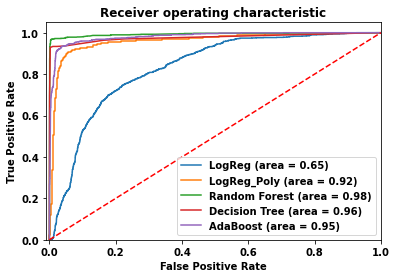

In [69]:
#ROC for logistic regression
logit_roc_auc = roc_auc_score(hr_target_test, logreg_classifier.predict(hr_attributes_test))
fpr, tpr, thresholds = roc_curve(hr_target_test, logreg_classifier.predict_proba(hr_attributes_test)[:,1])

#ROC for logistic regression with Polynomial Features
logit_poly_roc_auc = roc_auc_score(hr_target_test, logreg_poly_classifier.predict(hr_attributes_poly_test))
fpr_poly, tpr_poly, poly_thresholds = roc_curve(hr_target_test, logreg_poly_classifier.predict_proba(hr_attributes_poly_test)[:,1])

#ROC for Random Forest
rf_roc_auc = roc_auc_score(hr_target_test, rforest_classifier.predict(hr_attributes_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(hr_target_test, rforest_classifier.predict_proba(hr_attributes_test)[:,1])

#ROC for Decision Tree
dt_roc_auc = roc_auc_score(hr_target_test, dtree_classifier.predict(hr_attributes_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(hr_target_test, dtree_classifier.predict_proba(hr_attributes_test)[:,1])

#ROC for Linear SVM
#lsvm_roc_auc = roc_auc_score(hr_target_test, linear_svm_classifier.predict(hr_attributes_test))
#lsvm_fpr, lsvm_tpr, lsvm_thresholds = roc_curve(hr_target_test, linear_svm_classifier.predict_proba(hr_attributes_test)[:,1])

#ROC for Gaussian SVM
#gsvm_roc_auc = roc_auc_score(hr_target_test, gaussian_svm_classifier.predict(hr_attributes_test))
#gsvm_fpr, gsvm_tpr, gsvm_thresholds = roc_curve(hr_target_test, gaussian_svm_classifier.predict_proba(hr_attributes_test)[:,1])

#ROC for AdaBoost
ada_roc_auc = roc_auc_score(hr_target_test, adaboost_classifier.predict(hr_attributes_test))
ada_fpr, ada_tpr, ada_thresholds = roc_curve(hr_target_test, adaboost_classifier.predict_proba(hr_attributes_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='LogReg (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_poly, tpr_poly, label='LogReg_Poly (area = %0.2f)' % logit_poly_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
#plt.plot(lsvm_fpr, lsvm_tpr, label='Linear SVM (area = %0.2f)' % lsvm_roc_auc)
#plt.plot(gsvm_fpr, gsvm_tpr, label='Gaussian SVM (area = %0.2f)' % gsvm_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('ROC')
plt.show()

Random Forest provides the best classificator for our task!!!

### Out-of-Sample Testing

The algorithm with the best model and metrics seems to be Random Forest. Let's display its confusion matrix.

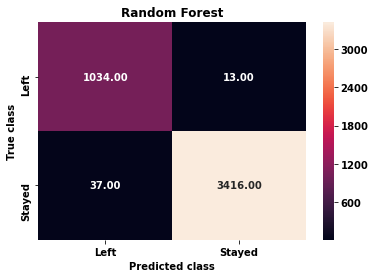

In [70]:
# Confusion matrix
test_predictions = rforest_classifier.predict(hr_attributes_test)
random_forest_cm = confusion_matrix(test_predictions, hr_target_test, [1,0])
sns.heatmap(
    random_forest_cm, 
    annot=True, 
    fmt='.2f',
    xticklabels = ['Left', 'Stayed'] , 
    yticklabels = ['Left', 'Stayed']
)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

Let's see Random Forest Classification Report on the train and test data.

In [71]:
print ('\n---Random Forest Train---')
print(classification_report(hr_target_train, rforest_classifier.predict(hr_attributes_train), digits=2))


---Random Forest Train---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      2500

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [72]:
print ('\n ---Random Forest Test---')
print(classification_report(hr_target_test, rforest_classifier.predict(hr_attributes_test)))


 ---Random Forest Test---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3429
           1       0.99      0.97      0.98      1071

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



#### Feature importances

We can check feature importances which assigns a score to input features based on how useful they are at predicting a target variable

In [73]:
# plot feature importances
feature_scores = pd.Series(rforest_classifier.feature_importances_,index = hr_attributes.columns).sort_values(ascending = False)
feature_scores

satisfaction_level                     0.271688
number_project                         0.198198
time_spend_company                     0.175915
average_montly_hours                   0.165841
time_since_last_evaluation_in_years    0.131660
work_accident_1                        0.008835
salary_low                             0.007502
work_accident_0                        0.005675
salary_high                            0.005344
salary_medium                          0.004122
department_technical                   0.003784
department_sales                       0.003770
department_support                     0.003382
department_IT                          0.002026
department_RandD                       0.001882
department_management                  0.001763
department_accounting                  0.001699
department_hr                          0.001653
department_marketing                   0.001449
promotion_last_5years_0                0.001409
department_product_mng                 0

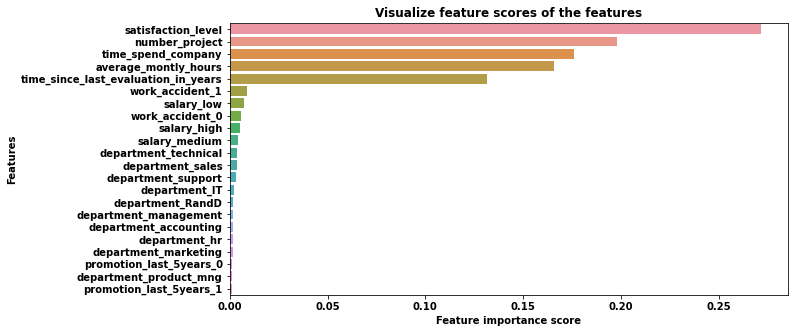

In [74]:
# Creating a seaborn bar plot for feature importances
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = feature_scores, y = feature_scores.index, data = hr_data)
ax.set_title('Visualize feature scores of the features')
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel('Feature importance score')
ax.set_ylabel('Features')
plt.show()

We have proved that features like satisfaction_level, time_since_last_evaluation_in_years, number_project, time_spend_company and average_monthly_hours are mostly used by the model to predict empolyees attrition.

### Discussion and Future Work

The dataset is a representative of the general workforce in today’s organizations. The good results from the classifiers used in this task justify that the features are causes that contribute to voluntary attrition.

Future work might include our model testing on a new experiment with same data distribution.

## Conclusion

This paper presented the effect of voluntary attrition on organizations, and why predicting it is important. It further outlined various classification algorithms based on supervised learning to solve the prediction problem.

The results of this research showed the superiority of the Random Forest classifier in terms of predictive effectiveness by means of showed metrics and the ROC curve. When used with its optimal configuration, it is a robust method that delivers accurate results in spite of the noise in the dataset, which is a major challenge for machine learning algorithms. Thefore it is recommended the use of the Random Forest classifier for accurately predicting employee attrition in an organization, which enables HR to take necessary action for the retention of employees predicted to be at risk of leaving.

### References

[1] Machine Learning course, SoftUni, trainer Yordan Darakchiev: https://softuni.bg

[2] Data Science course, SoftUni, Daniela Yordanova project: Telcom customers churn

[3] https://builtin.com/data-science/random-forest-algorithm

[4] https://www.analyticssteps.com/blogs/how-does-support-vector-machine-algorithm-works-machine-learning

[5] https://www.analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/

[6] https://seaborn.pydata.org/

[7] https://www.knowledgehut.com/blog/data-science/boosting-and-adaboost-in-machine-learning

[8] https://www.javatpoint.com/linear-regression-vs-logistic-regression-in-machine-learning

[9] https://stattrek.com/multiple-regression/dummy-variables.aspx

[10] https://www.researchgate.net/publication/326029536_Employee_Attrition_Prediction

[11] Hands-On Machine Learning with Scikit-Learn and TensorFlow_ Concepts, Tools, and Techniques to B.pdf

[12] https://www.kaggle.com/prashant111/random-forest-classifier-feature-importance